#                             Credit Card Anomly Detection

In [38]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [39]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics ##Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB


In [40]:
data=pd.read_csv('creditcard.csv') #loading data
labels= ["Normal", "Fraud"]

The datasets contains transactions made by credit cards in September 2013 by european cardholders.It contains only numerical input variables which are the result of a PCA transformation.Features V1, V2, … V28 are the principal components obtained with PCA.

In [41]:
data.head()  #to view first few columns on dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
df = data.sample(frac=0.1)
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [44]:
data.isnull().values.any()      #to check for duplicate elements


False

In [45]:
df.nunique() #Prints total number of unique elements in each columns

Time      25753
V1        28256
V2        28256
V3        28256
V4        28256
V5        28256
V6        28256
V7        28256
V8        28256
V9        28256
V10       28256
V11       28256
V12       28256
V13       28256
V14       28256
V15       28256
V16       28256
V17       28256
V18       28256
V19       28256
V20       28256
V21       28256
V22       28256
V23       28256
V24       28256
V25       28256
V26       28256
V27       28256
V28       28256
Amount     8923
Class         2
dtype: int64

In [46]:
data = data.sample(frac=0.1, random_state = 48)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94303.978126      0.000084     -0.007061      0.013951     -0.009899   
std     47450.510233      1.939031      1.619107      1.520114      1.408995   
min         0.000000    -40.470142    -38.430842    -31.103685     -4.897347   
25%     53923.000000     -0.923893     -0.605220     -0.873069     -0.857457   
50%     83955.000000      0.005146      0.056073      0.199804     -0.030054   
75%    138785.000000      1.310402      0.797713      1.037859      0.728976   
max    172788.000000      2.446505     16.713389      3.934537     12.114672   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.000024     -0.000812     -0.006474     -0.001324     -0.001497   
std        1.352572      1.322

Text(0, 0.5, 'Frequency')

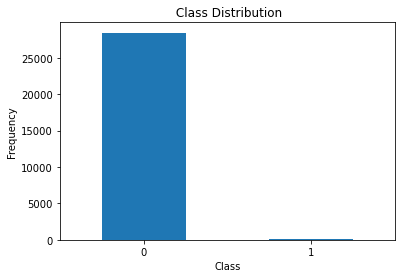

In [47]:
c=pd.value_counts(data['Class'], sort = True)
c.plot(kind = 'bar', rot=0)
plt.title(" Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

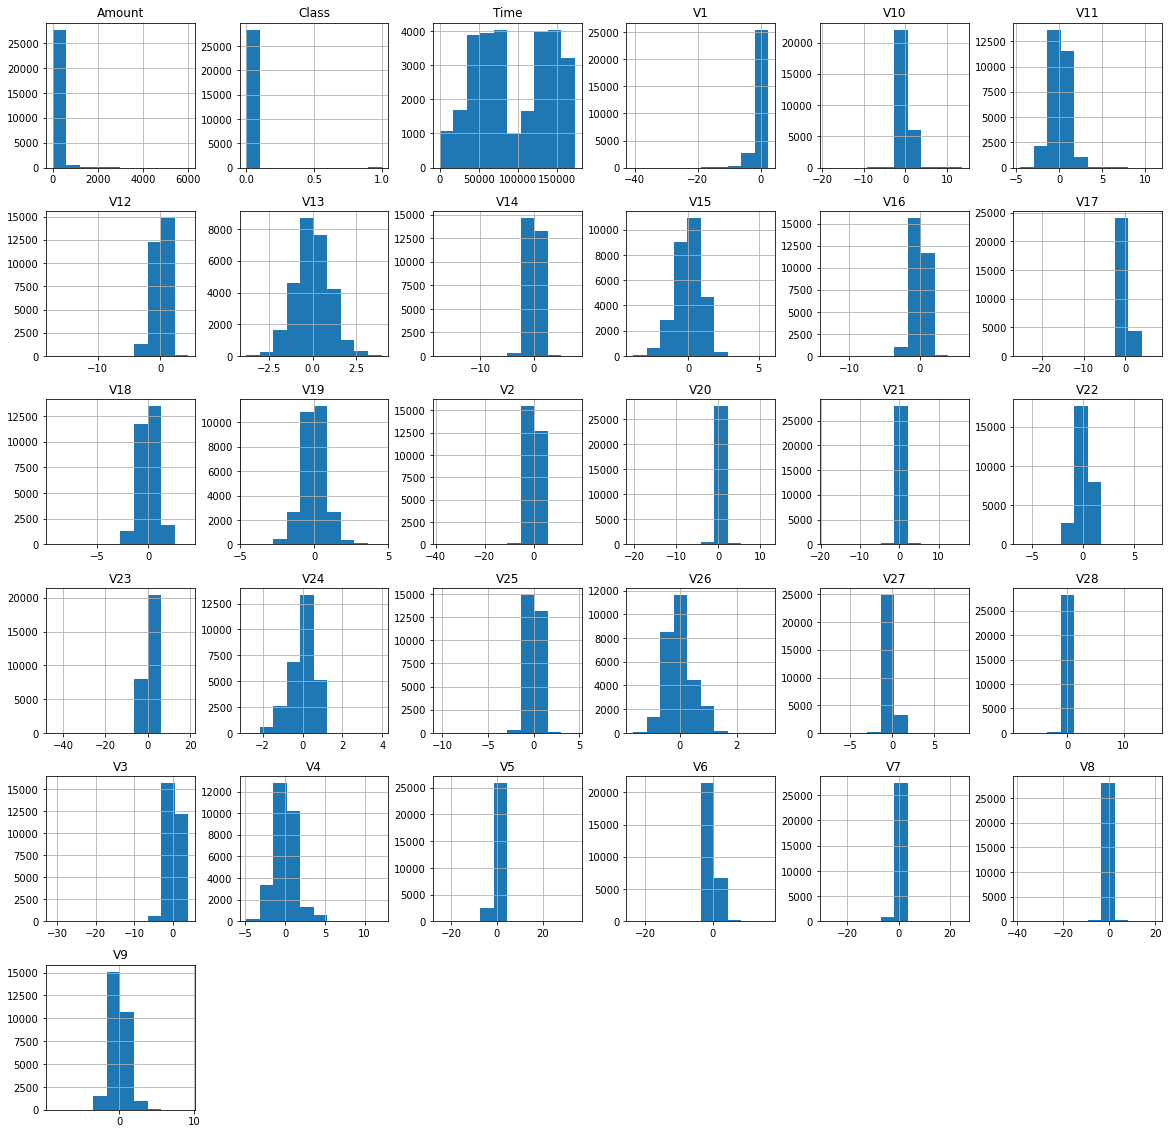

In [48]:
data.hist(figsize=(20,20))
plt.show() 


#Most of the V parameters are found to
#be clustered around 0 with some V's showing fairly large outliers and some showing no outliers at all.

In [64]:
fraud = data[data['Class']==1] #classifing fraud and normal 
normal = data[data['Class']==0]


In [50]:
outlierfraction = len(fraud)/float(len(normal))
print(outlierfraction)

0.0019700967458223394


In [51]:
fraud.Amount.describe()

count     56.000000
mean      91.449464
std      164.524448
min        0.000000
25%        1.000000
50%       18.520000
75%      109.307500
max      996.270000
Name: Amount, dtype: float64

In [52]:
normal.Amount.describe()

count    28425.000000
mean        88.572094
std        234.229021
min          0.000000
25%          5.980000
50%         21.990000
75%         77.000000
max       6000.000000
Name: Amount, dtype: float64

In [53]:
features=data.drop(['Class'], axis=1)
target=data['Class']
X=features.values
Y=target.values
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 42)


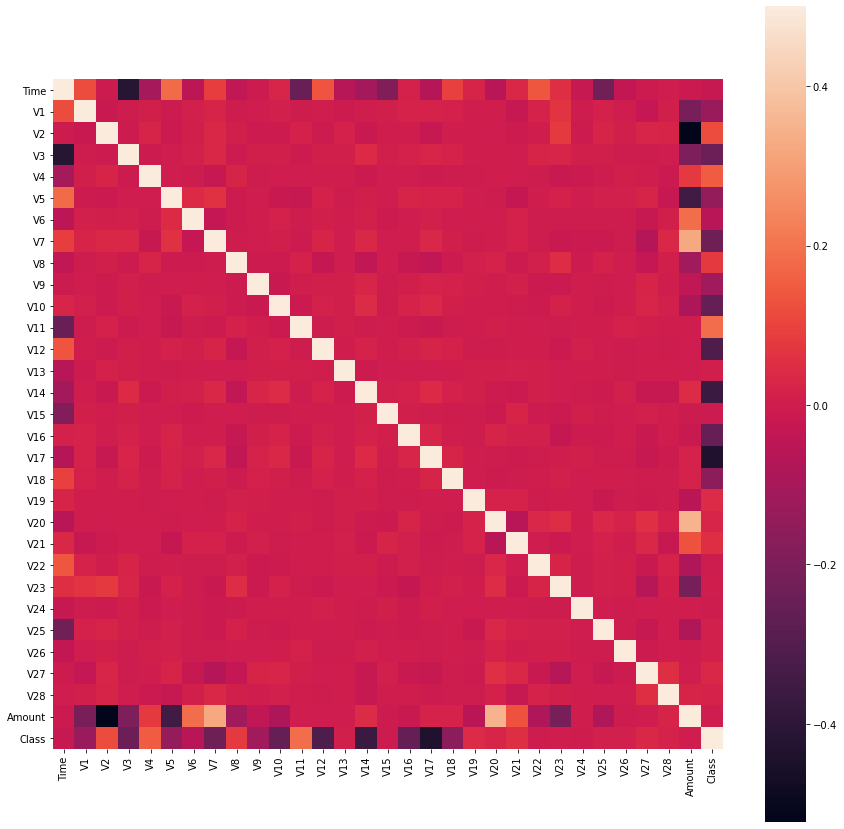

In [54]:
#A correlation matrix is used to summarize data, as an input into a more advanced analysis

correlationmatrix=data.corr()
fig=plt.figure(figsize=(15,15))
sns.heatmap(correlationmatrix,vmax = 0.5, square = True)
plt.show()

### Some V parameters show strong positive correlation and some others show strong negative correlation.
### V parameters do not have any correlation with each other. parameters V1 to V18 show pretty strong correlation with the class parameter and all remaining parameters show nearly no correlation with the class column.

### Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

In [55]:
ml = GaussianNB()  #Create a Gaussian Classifier
model=ml.fit(X_train,Y_train) ##Train the model using the training sets
predict=ml.predict(X_test) #Predict the response for test dataset
print("predicted values : {}".format(predict))  #printing predicted values
print("Accuracy: {}".format(metrics.accuracy_score(Y_test, predict))) ## Model Accuracy, how often is the classifier correct?

predicted values : [0 0 0 ... 0 0 0]
Accuracy: 0.9956991134907399


# Using KNN Algorithm

In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


# Input data files are available in the "../input/" directory.

knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)

In [57]:
data=pd.read_csv('creditcard.csv') 
features=data.drop(['Class'], axis=1)
target=data['Class']
X=features.values
Y=target.values
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 42)


In [58]:
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
print("classifier created")
score = knn.score(X_test,Y_test)
print(score)


classifier created
0.9983848739938379


In [59]:
from sklearn import metrics
confusion = metrics.confusion_matrix(Y_test, pred)
print(confusion)


[[113731      1]
 [   183      8]]


In [60]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [61]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(Y_test, pred))

0.9983848739938379
0.9983848739938379


In [66]:
precision = TP / float(TP + FP)

print(precision)
knn_pre=precision_score(Y_test,pred)
print(knn_pre)

0.8888888888888888
0.8888888888888888
